<a href="https://colab.research.google.com/github/m-hossni/Tensorflow-and-Keras-INFO-6146-F24/blob/main/project%20files/DoubleLayeredANN/DblLayer_Dropout_Jack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DOUBLE LAYERED ANN with Dropout**


---
## **Group 3**

**Ghazi Al Barakeh, Mohamed Ali, Maher Alqarra, Jack Ivanisevic, Muhammad Usman Raza**

**Coded by:** Jack Ivanisevic

---






In [12]:
# Import ibraries needed
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Import the MNIST Fashion dataset from Keras
from tensorflow.keras.datasets import fashion_mnist


In [4]:
# Load and preprocess the dataset

# Load the dataset into training and testing sets. x_train contains the images, and y_train contains the corresponding labels (the type of clothing).
# x_test and y_test are for evaluating the model later.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape the training images from 28x28 pixels into a flat array of 784 pixels (28 * 28) for each of the 60,000 images.
# also convert the pixel values to float32 type and normalizes them to be between 0 and 1 by dividing by 255.
x_train = x_train.reshape((60000, 28 * 28)).astype('float32') / 255

# Do the same for the test images
x_test = x_test.reshape((10000, 28 * 28)).astype('float32') / 255

# Create a double-layered ANN with dropout
model = keras.Sequential([
    # Adds a dense layer with 128 neurons. Use the ReLU activation function.
    # input_shape=(28 * 28,) specifies that each input has 784 features (the flattened pixel values).
    layers.Dense(128, activation='relu', input_shape=(28 * 28,)),

    # Adds a dropout layer that randomly ignores 20% of the neurons during training.
    # Helps prevent overfitting, which means it makes the model more generalized and less likely to memorize the training data.
    layers.Dropout(0.2),  # Dropout layer

    # Adds another dense layer with 64 neurons using the ReLU activation function.
    # This is a hidden layer that processes information from the previous layer.
    layers.Dense(64, activation='relu'),  # Hidden layer

    # Add another dropout layer, ignoring 20% of the neurons again to help with overfitting.
    layers.Dropout(0.2),  # Dropout layer

    # Add the output layer with 10 neurons (one for each class of clothing).
    # The softmax activation function converts the output into probabilities, making it suitable for multi-class classification.
    layers.Dense(10, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              # Specifies the loss function. sparse_categorical_crossentropy is used for multi-class classification
              # measuring how well the predicted probabilities match the true labels.
              loss='sparse_categorical_crossentropy',
              # Specifie the metrics to track during training. Track accuracy, which let's us know how many predictions were correct.
              metrics=['accuracy'])


# Train the model
# Trains the model on the training data. It runs for 10 epochs and uses a batch size of 32 (updating weights after processing 32 images).
# validation_split=0.2 = 20% of the training data is used to validate the model during training.
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
# Evaluates the model on the test data. It calculates the loss and accuracy on the test set,
# providing an indication of how well the model performs on unseen data.
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print the test accuracy, showing how many of the test images were classified correctly.
print(f'Test accuracy: {test_acc}')



Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7224 - loss: 0.7822 - val_accuracy: 0.8457 - val_loss: 0.4200
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8410 - loss: 0.4461 - val_accuracy: 0.8396 - val_loss: 0.4327
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8492 - loss: 0.4124 - val_accuracy: 0.8704 - val_loss: 0.3600
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8617 - loss: 0.3736 - val_accuracy: 0.8758 - val_loss: 0.3408
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8671 - loss: 0.3625 - val_accuracy: 0.8640 - val_loss: 0.3671
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8757 - loss: 0.3402 - val_accuracy: 0.8733 - val_loss: 0.3455
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8724 - loss: 0.3423 - val_accuracy: 0.8779 - val_loss: 0.3387
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8774 - loss: 0.3321 - 

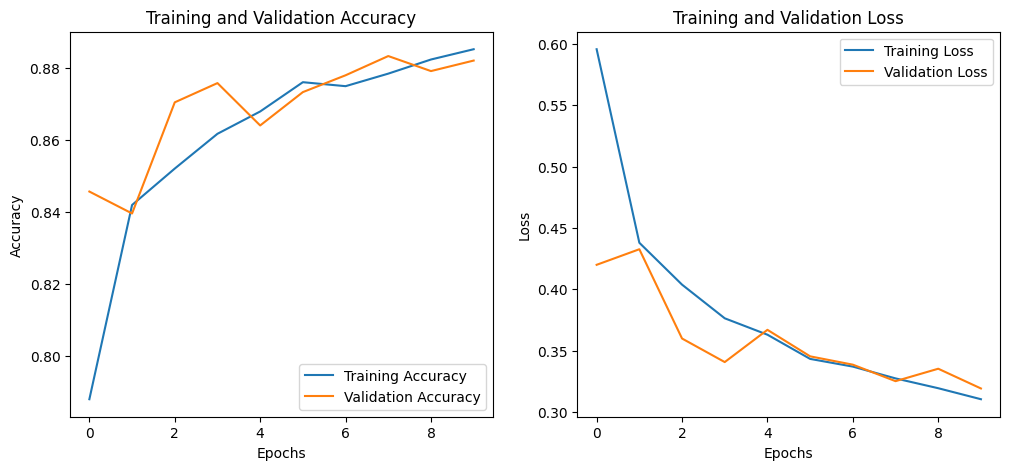

In [13]:
# Plot accuracy
# Create a new figure for plotting. figsize=(12, 5).
plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
# Create a subplot in the figure for the training and validation accuracy
plt.subplot(1, 2, 1)

# Plot the training accuracy over epochs using the values recorded in history.
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plot the validation accuracy over epochs.
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Set the title for the subplot.
plt.title('Training and Validation Accuracy')

# Label the x-axis.
plt.xlabel('Epochs')

# Label the y-axis.
plt.ylabel('Accuracy')

# Display a legend for the plotted lines, distinguishing between training and validation accuracy.
plt.legend()

# Plot training and validation loss
# Create a second subplot for the training and validation loss.
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the figure with the plots on the screen.
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


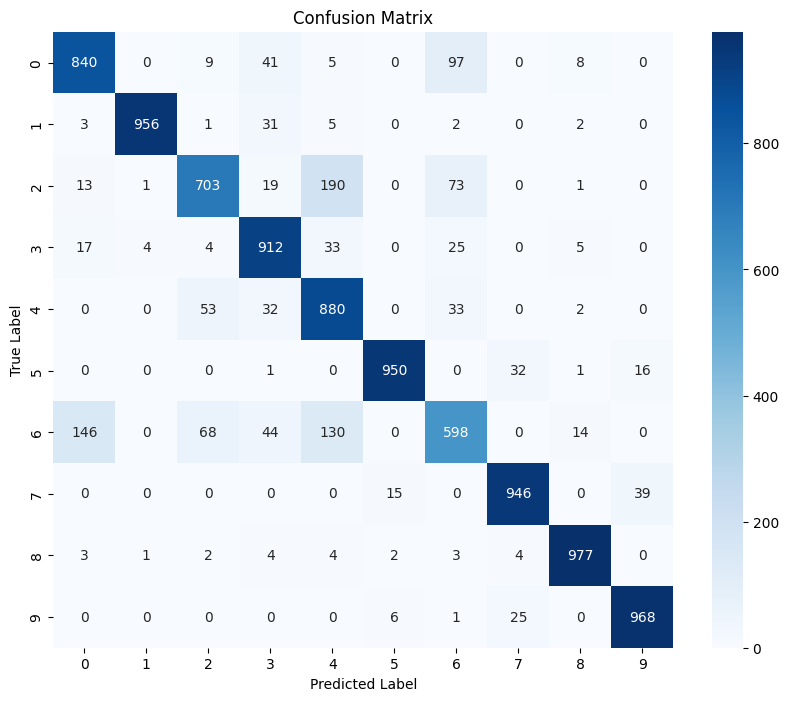

In [14]:
# Predict the classes
# Use the trained model to predict classes for the test dataset. y_pred contains the predicted probabilities for each of the 10 classes (clothing items) for each image in x_test.
y_pred = model.predict(x_test)

# Convert the predicted probabilities into class labels. np.argmax(y_pred, axis=1) return the index of the maximum probability for each image, giving the predicted class (0-9).
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
# Calculate the confusion matrix using the true labels (y_test) and the predicted labels (y_pred_classes).
# The confusion matrix shows the counts of true positives, false positives, false negatives, and true negatives for each class.
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
# Create a new figure for plotting the confusion matrix.
plt.figure(figsize=(10, 8))

# Create a heatmap for the confusion matrix using Seaborn: conf_matrix: The data to plot (the confusion matrix).annot=True: Enables annotations inside the squares (showing the counts).
# fmt='d': Specifies that the annotations should be displayed as integers. cmap='Blues': Sets the color map to shades of blue. xticklabels=np.arange(10): Labels for the x-axis (predicted classes, from 0 to 9).
# yticklabels=np.arange(10): Labels for the y-axis (true classes, from 0 to 9).
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))

# Label the x-axis
plt.xlabel('Predicted Label')

# Label the y-axis
plt.ylabel('True Label')

# Set the title of the plot
plt.title('Confusion Matrix')

# Display the the figure with the confusion matrix
plt.show()

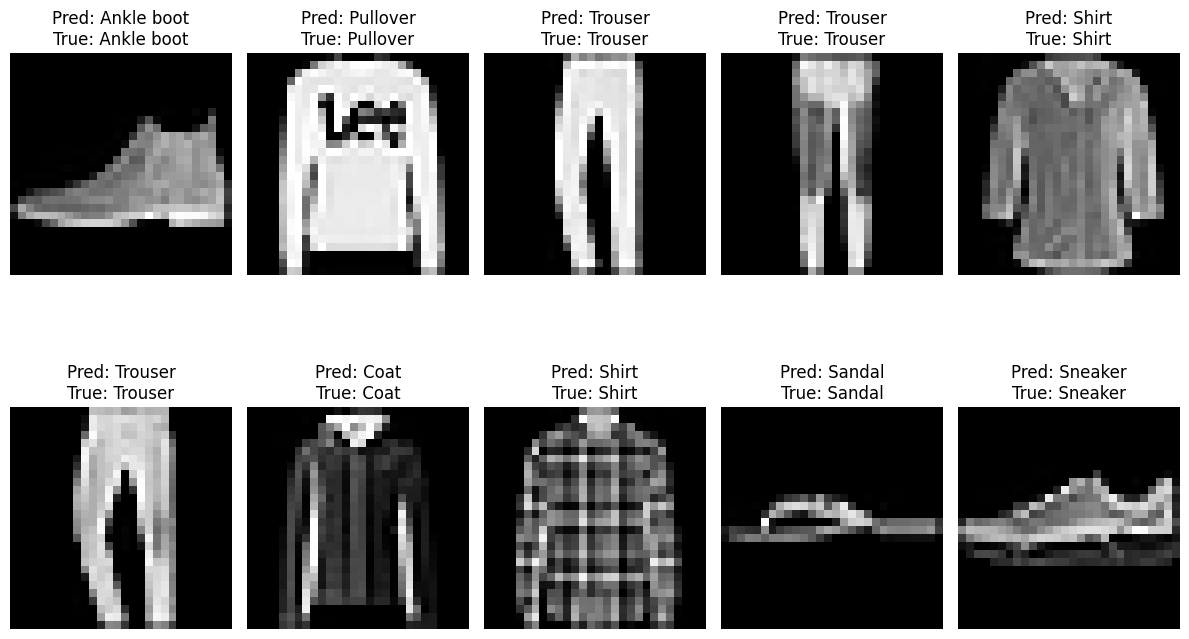

In [15]:
# Define the number of images to display.
num_images = 10

# Create a list of class names that correspond to the labels in the Fashion-MNIST dataset. Each index in this list matches the numeric class label (0-9).
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress',
    'Coat', 'Sandal', 'Shirt', 'Sneaker',
    'Bag', 'Ankle boot'
]

# Create a new figure for plotting. The size of the figure is set to 12 inches wide and 8 inches tall.
plt.figure(figsize=(12, 8))

# Start a loop that will iterate num_images times allowing us to plot multiple images.
for i in range(num_images):
    # Create a subplot for each image in a grid layout. Specify a grid of 2 rows and 5 columns. The i + 1 ensures that each subplot gets a unique index.
    plt.subplot(2, 5, i + 1)

    # Display the i-th image from the test set. The image data is reshaped from a flat array of 784 pixels back into a 28x28 pixel format.
    # cmap='gray' the image should be shown in grayscale.
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')

    # Set the title for the subplot.
    plt.title(f'Pred: {class_names[y_pred_classes[i]]}\nTrue: {class_names[y_test[i]]}')

    # Remove the axis ticks and labels from the subplot, give a cleaner view of the images.
    plt.axis('off')

# Adjust the spacing between subplots to prevent overlapping and ensure everything fits well within the figure.
plt.tight_layout()

# Display the figure
plt.show()